In [1]:
# import our package
from spiritvision import *

In [2]:
data_loader = make_data_loader(get_processed_data_dir(), batch_size=9)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [3]:
# ResNet Vision Learner
arch = "18"
learn = resnet_learner(data_loader, arch)

D:\ENGINEERING\mezcal\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
D:\ENGINEERING\mezcal\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# Train
learn.fine_tune(10)

save_path = os.path.join(get_models_dir(), f"resnet{arch}_model")
learn.save(save_path)

epoch,train_loss,valid_loss,accuracy,time
0,2.606270,1.600029,0.392857,00:16


epoch,train_loss,valid_loss,accuracy,time
0,1.805735,1.325017,0.428571,00:18
1,1.756471,0.942690,0.642857,00:17
2,1.645113,0.541894,0.892857,00:18
3,1.470457,0.336811,0.892857,00:18
4,1.296465,0.295725,0.892857,00:17
5,1.121837,0.386955,0.821429,00:17
6,0.969296,0.323001,0.928571,00:17
7,0.875150,0.310311,0.928571,00:18
8,0.792179,0.302428,0.964286,00:17
9,0.773810,0.337478,0.928571,00:17


Path('d:/engineering/mezcal/models/resnet18_model.pth')

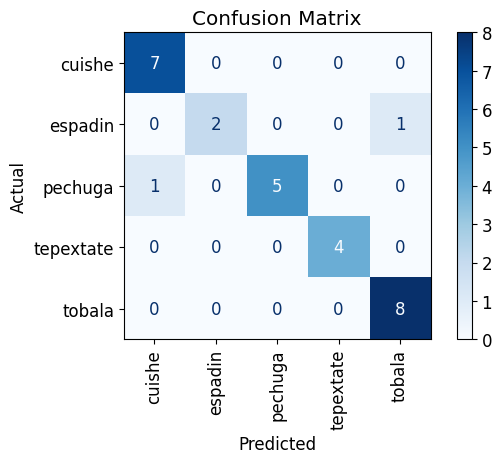

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
cm = interp.confusion_matrix()
cm_png_path = os.path.join(get_root_dir(), "confusion_matrix.png")

save_confusion_matrix_plot(confusion_matrix=cm, labels=data_loader.vocab, path=cm_png_path)

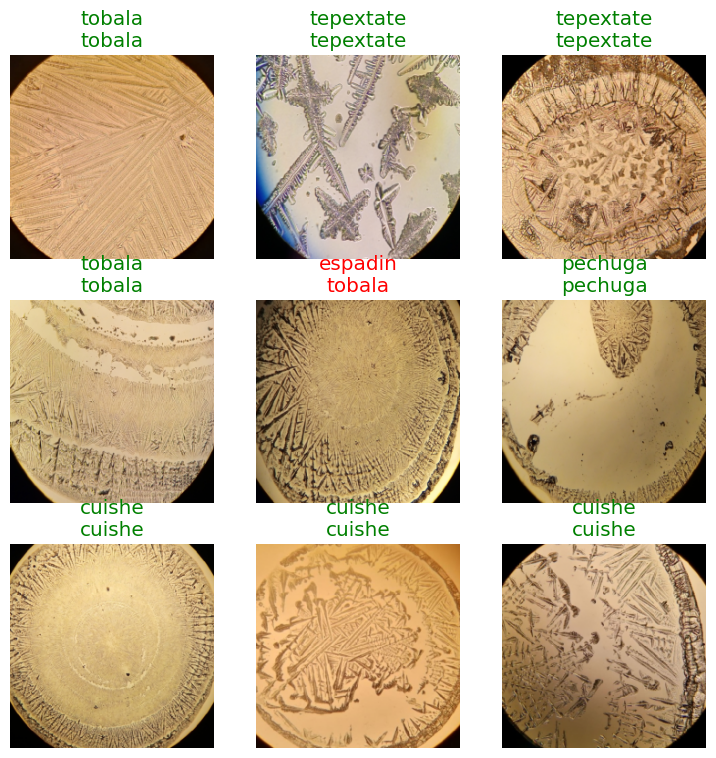

In [6]:
learn.show_results()